In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.shape

(5110, 12)

## kiểm tra xem data có rỗng hay không

In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## mô tả thông tin các cột
### gender : giới tính
### age : tuổi
### hypertension : huyết áp cao
### heart_disease : bệnh tim
### ever_married: tình trạng hôn nhân 
### work_type : loại công việc 
### Residence_type : khu vực sinh sống
### avg_glucose_level : mức độ tiểu đường
### smoking_status : tình trạng hút thuốc
### stroke : đột quỵ

In [8]:
duplicate = df[df.duplicated()]

duplicate

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


### xóa data rỗng

In [9]:
# Xóa các hàng có giá trị thiếu trong cột "bmi"
df = df.dropna(subset=['bmi'])

In [10]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### trực quan hóa data


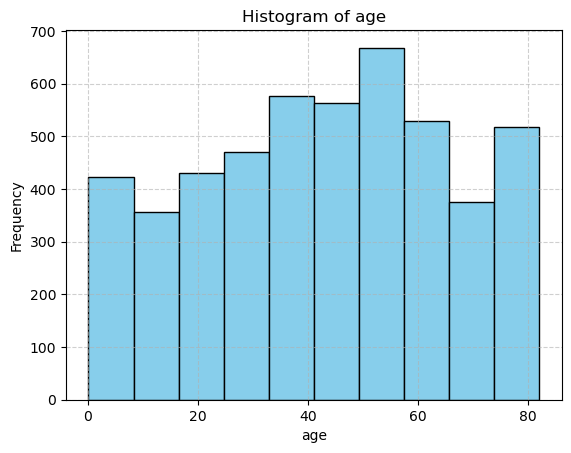

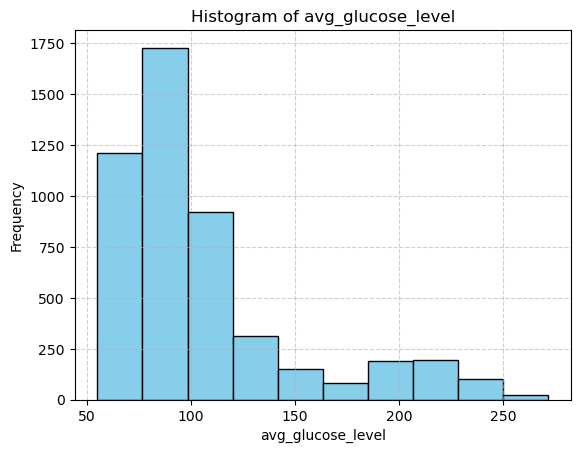

In [11]:
df_numerical2 = ['age', 'avg_glucose_level']

for column in df_numerical2:
    plt.hist(df[column], color='skyblue', edgecolor='black')  # Thay đổi màu ở đây
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)  # Thêm lưới để dễ nhìn thấy
    plt.show()

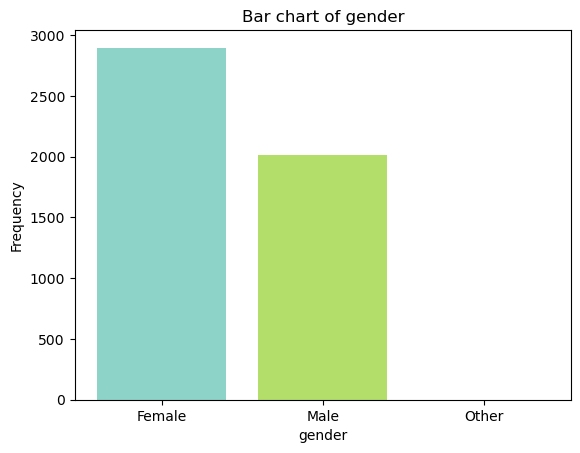

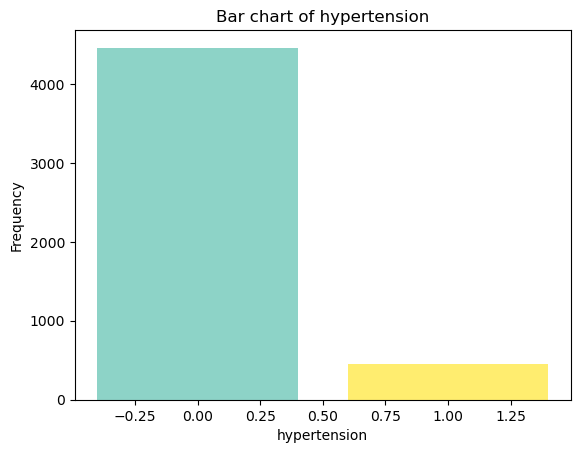

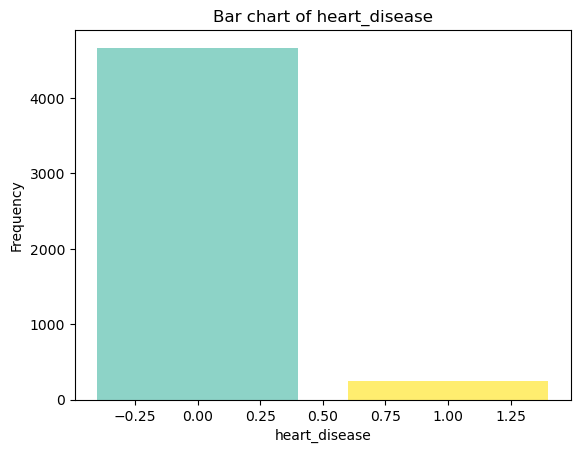

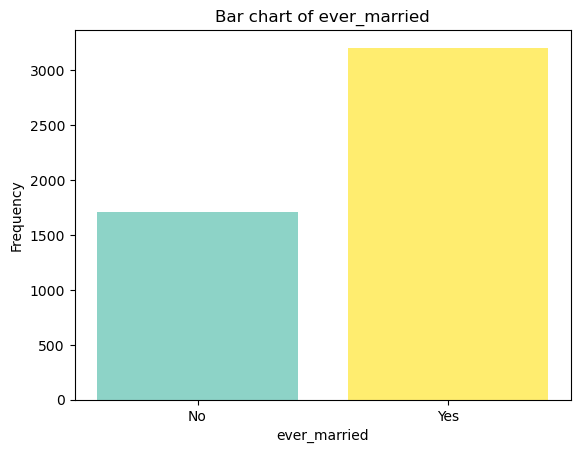

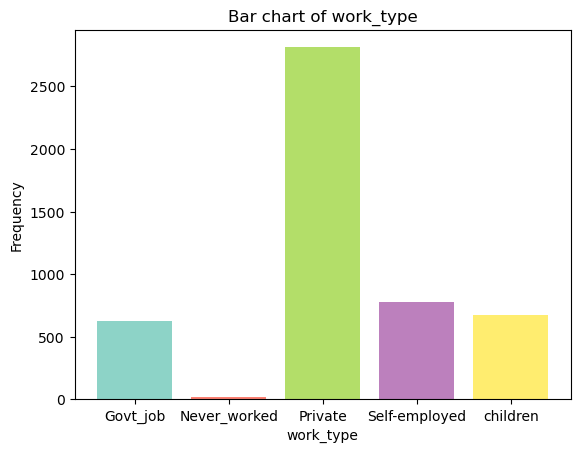

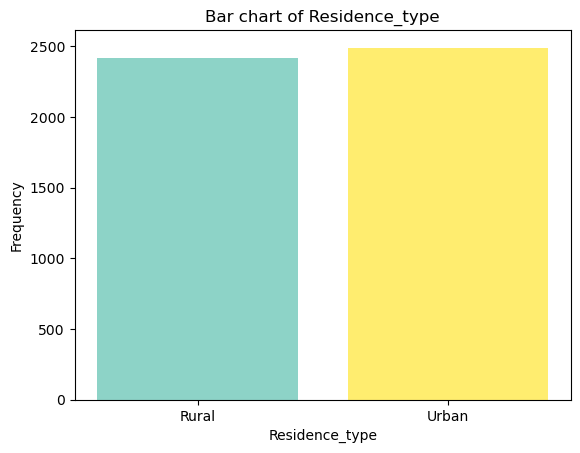

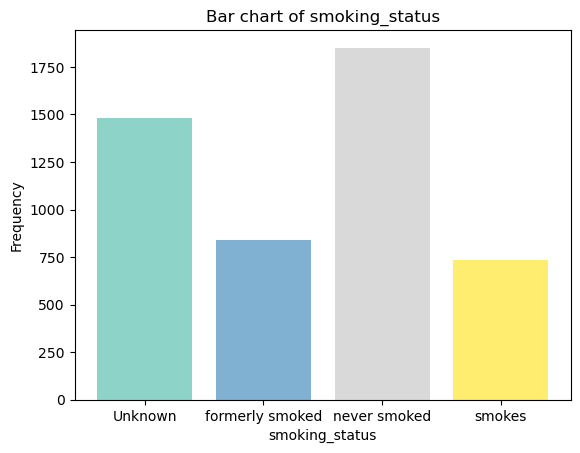

In [12]:
df_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for column in df_categorical:
    values, counts = np.unique(df[column], return_counts=True)
    colors = plt.cm.Set3(np.linspace(0, 1, len(values)))  # Tạo một gradient màu sắc từ bảng màu Set3
    plt.bar(values, counts, color=colors)
    plt.title(f'Bar chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency') 
    plt.show()

In [13]:
variable_names = []
chi2_p_values = []

for var in df_categorical:
    contingency_table = pd.crosstab(df[var], df['stroke'])
    
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    variable_names.append(var)
    chi2_p_values.append(p)

chi2_results = pd.DataFrame({'Categorical Variable': variable_names, 'Chi-Square p-value': chi2_p_values})

chi2_results = chi2_results.sort_values(by='Chi-Square p-value')

print(chi2_results)
df.shape

  Categorical Variable  Chi-Square p-value
1         hypertension        6.033751e-23
2        heart_disease        2.067778e-21
3         ever_married        3.128341e-13
4            work_type        1.705567e-08
6       smoking_status        1.252202e-07
5       Residence_type        7.249228e-01
0               gender        8.700409e-01


(4909, 12)

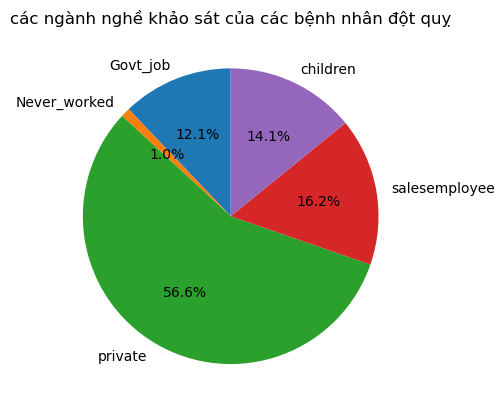

In [14]:


# Dữ liệu mẫu
labels = ['Govt_job', 'Never_worked', 'private', 'salesemployee','children']
sizes = [600, 50, 2800, 800,700]

# Tạo biểu đồ tròn
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Thêm tiêu đề
plt.title('các ngành nghề khảo sát của các bệnh nhân đột quỵ')

# Hiển thị biểu đồ
plt.show()

## sơ đồ nhiệt và ma trận tương quan

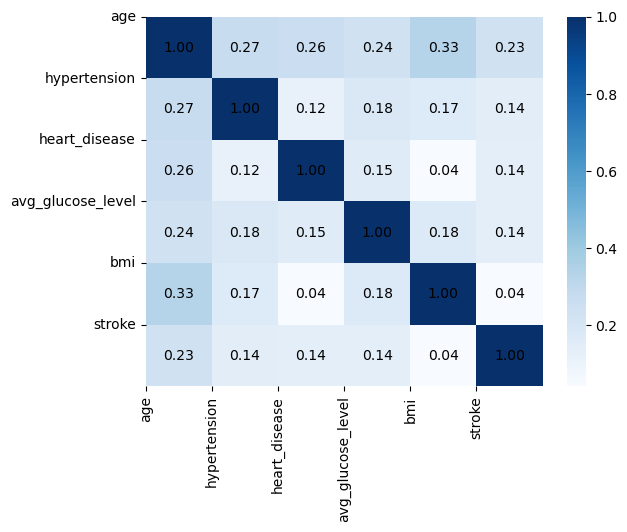

In [15]:
df_numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_columns = df[df_numerical]
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, cmap='Blues')
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = '{:.2f}'.format(corr_matrix.iloc[i, j])
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()


## qua biểu đồ nhiệt ta có thể thấy rõ ràng mối tương quan của các chỉ số
### 1. những người cao tuổi đều có nguy cơ bị cao huyết áp
### 2. những người mắc bệnh tim đều có nguy cơ huyết áp cao
### 3. những người bị tiểu đường cao đều có nguy cơ mắc bệnh tim cao
### 4 . chỉ số BMI cũng có ảnh hưởng đến người bị tiểu đường và nguy cơ bị đột quỵ cao

### ánh xạ dữ liệu

In [16]:
gender_mapping = {'Male': 0, 'Female': 1, np.nan : 2}
ever_married_mapping = {'No': 0, 'Yes': 1, np.nan : 2}
work_type_mapping = {'Never_worked': 0, 'Govt_job': 1, 'Self-employed': 2, 'children' : 3, 'Private' : 4, np.nan : 5}
Residence_type_mapping = {'Rural': 0, 'Urban': 1, np.nan : 2}
smoking_status_mapping = {'smokes': 0, 'formerly smoked': 1, 'unknown': 2, 'never smoked' : 3, np.nan : 4}

df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['work_type'] = df['work_type'].map(work_type_mapping)
df['Residence_type'] = df['Residence_type'].map(Residence_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.0,67.0,0,1,1,4,1,228.69,36.6,1.0,1
2,31112,0.0,80.0,0,1,1,4,0,105.92,32.5,3.0,1
3,60182,1.0,49.0,0,0,1,4,1,171.23,34.4,0.0,1
4,1665,1.0,79.0,1,0,1,2,0,174.12,24.0,3.0,1
5,56669,0.0,81.0,0,0,1,4,1,186.21,29.0,1.0,1


In [18]:
features = ["age",'hypertension', 'heart_disease', 'ever_married', 'work_type']
X = df[features]
Y = df['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### chia dữ liệu để huấn luyện 80% train và 20% thử


In [19]:
features = ["age",'hypertension', 'heart_disease', 'ever_married', 'work_type']
X = df[features]
Y = df['stroke']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


In [20]:
X_train['age'].head()

3253    34.0
3867    31.0
3932    23.0
3258    42.0
979     34.0
Name: age, dtype: float64

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## RandomForestClassifier thuật toán

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

## tạo ra 100 cây quyết định trong rừng

Accuracy: 0.9307535641547862
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       929
           1       0.11      0.04      0.06        53

    accuracy                           0.93       982
   macro avg       0.53      0.51      0.51       982
weighted avg       0.90      0.93      0.92       982



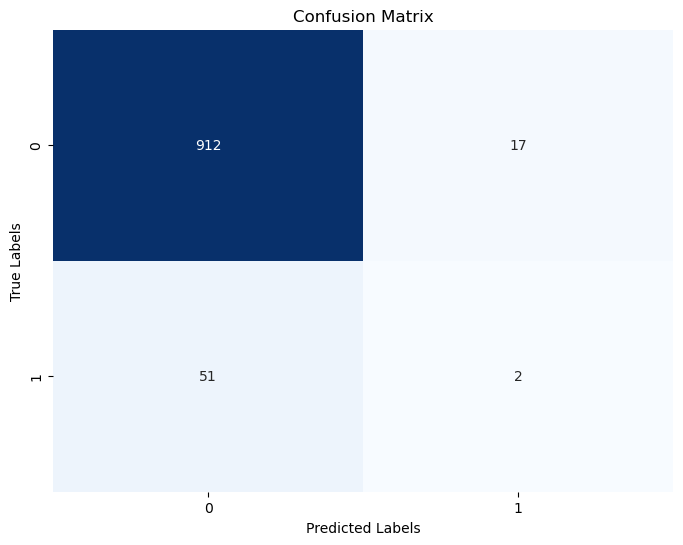

In [23]:
from sklearn.metrics import accuracy_score, classification_report

# ... (phần mã khác)

# Dự đoán trên dữ liệu kiểm thử
Y_pred = rf_classifier.predict(X_test)

# Tính toán ma trận nhầm lẫn
confusion = confusion_matrix(Y_test, Y_pred)

# Tính toán độ chính xác
accuracy = accuracy_score(Y_test, Y_pred)

# In độ chính xác và báo cáo phân loại
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Tạo biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Giả sử X_train, X_test, Y_train, Y_test đã được định nghĩa trước

# Tạo một mô hình Linear Regression
mo_hinh_hoi_quy = LinearRegression()

# Huấn luyện mô hình trên dữ liệu huấn luyện
mo_hinh_hoi_quy.fit(X_train, Y_train)

# Dự đoán trên dữ liệu kiểm thử
Y_pred = mo_hinh_hoi_quy.predict(X_test)

# Chuyển các giá trị dự đoán thành các lớp (nếu cần)
# (Ví dụ: Nếu bạn muốn làm mô hình phân loại từ mô hình hồi quy)
# Y_pred_classes = np.round(Y_pred).astype(int)

# Đánh giá mô hình (sử dụng các độ đo phù hợp với hồi quy)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.04748559982690692
R-squared: 0.06997778972150603


## đánh giá 2 thuật toán

## RandomForestClassifier có độ chính xác cao hơn rõ rệt so với Linear Regression
## thông qua 2 chỉ số 

Biểu đồ rừng quyết định đã được lưu vào file decision_tree.pdf


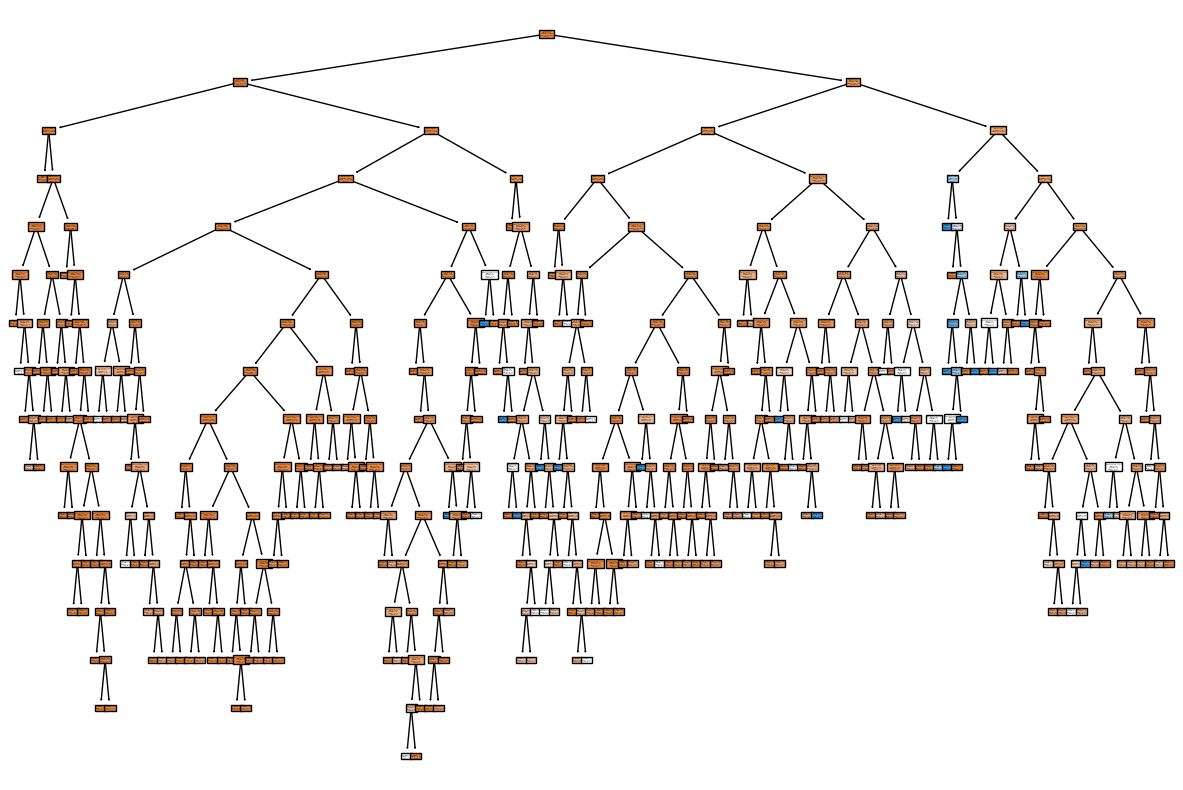

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages



# Tách các thuộc tính và nhãn từ dữ liệu
X = df.drop('stroke', axis=1)
y = df['stroke']

# Xây dựng mô hình rừng quyết định
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Vẽ rừng quyết định
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)

# Tạo file PDF và lưu biểu đồ vào đó
with PdfPages('decision_tree.pdf') as pdf:
    pdf.savefig(fig)

# In thông báo khi lưu thành công
print("Biểu đồ rừng quyết định đã được lưu vào file decision_tree.pdf")